# Preamble

In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from array import array
import pickle
import statistics as st
plt.ion()

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


#load in the database simulation (also a good check that you are reading the right database file!)
sim = db.get_simulation('cosmo25')

In [2]:
##getting the last time step
step = db.get_timestep('cosmo25/%8192')

In [3]:
solar_metal = 0.0134

# Data

In [4]:
f = open('./Data/stellar_metal_BH.pkl', 'rb')
stellar_metal_BH_data = pickle.load(f)
f.close

f = open('./Data/gas_metal_BH.pkl', 'rb')
gas_metal_BH_data = pickle.load(f)
f.close()

f = open('./Data/stellar_metal.pkl', 'rb')
stellar_metal_data = pickle.load(f)
f.close()

f = open('./Data/gas_metal.pkl', 'rb')
gas_metal_data = pickle.load(f)
f.close()

f = open('./Data/stellar_h_frac.pkl', 'rb')
stellar_h_data = pickle.load(f)
f.close()

f = open('./Data/gas_h_frac.pkl', 'rb')
gas_h_data = pickle.load(f)
f.close()

f = open('./Data/metal_cut.pkl', 'rb')
metal_cut_data = pickle.load(f)
f.close()

f = open('./Data/Fe_Ox_data.pkl', 'rb')
saved_Fe_Ox_data = pickle.load(f)
f.close()

f = open('./Data/SFR_data.pkl', 'rb')
saved_SFR_data = pickle.load(f)
f.close()

In [5]:
all_halo_numbers = np.array(gas_metal_data['halo_number'])
halo_with_BH = np.unique(step.calculate_all('host_halo.halo_number()')[0])

BH_halo_ind = np.in1d(all_halo_numbers, halo_with_BH)
halo_no_BH_ind = np.in1d(all_halo_numbers, halo_with_BH, invert = True)

# Functions

In [6]:
def big_get_halo_ind(arr1, num, i):
    x = []
    if arr1[i] > num:
        x = np.append(x, i)
    return x

In [7]:
def small_get_halo_ind(arr1, num2, i):
    x = []
    if arr1[i] < num2:
        x = np.append(x, i)
    return x

In [8]:
def between_get_halo_ind(arr1, num1, num2, i):
    x = []
    if num1 < arr1[i] < num2:
        x = np.append(x, i)
    return x

In [9]:
def get_ave(arr1):
    x = []
    x = sum(arr1)/len(arr1)
    return x

In [10]:
def mass_bin_error(num1, num2):
    x = (num2 - num1)/2
    return x

# Cuts for Gas

In [11]:
stellar_fe_h_all = saved_Fe_Ox_data['Stellar_fe_h']
stellar_mass_all = stellar_metal_data['tot_stellar_mass']


stellar_fe_h = stellar_fe_h_all[halo_no_BH_ind]
BH_stellar_fe_h = stellar_fe_h_all[BH_halo_ind]

stellar_mass = stellar_mass_all[halo_no_BH_ind]

stellar_mass_BH = stellar_metal_BH_data['BH_stellar_mass']

In [12]:
gas_ox_h_all = saved_Fe_Ox_data['Gas_ox_h']
gas_ox_h = gas_ox_h_all[halo_no_BH_ind]
BH_gas_ox_h = gas_ox_h_all[BH_halo_ind]

## No BH

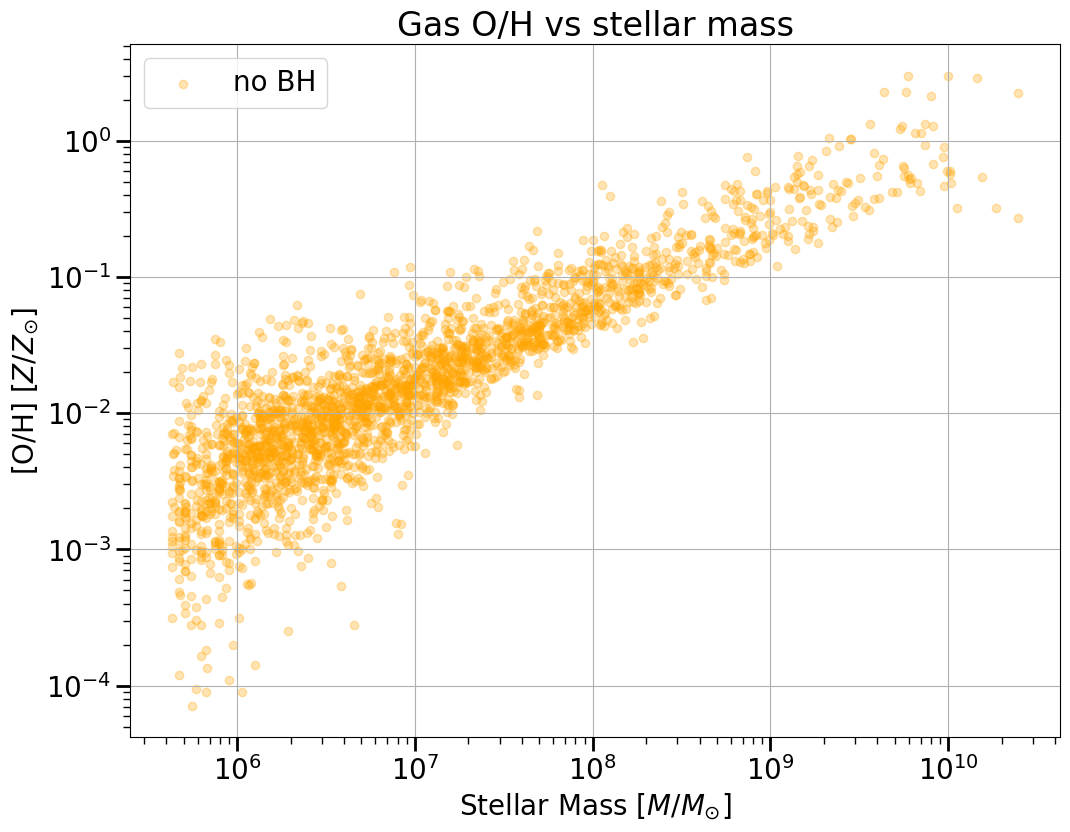

In [13]:
#plt.scatter(stellar_mass_BH, BH_gas_ox_h/solar_metal, color = 'black', label = 'with BH')
plt.scatter(stellar_mass, gas_ox_h/solar_metal, color = 'orange', label = 'no BH', alpha = 0.3)


plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e8, 1e11])
#plt.ylim([1e-1, 1e0])


plt.title('Gas O/H vs stellar mass')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('[O/H] $[Z/Z_{\odot}]$')
#plt.colorbar(label = 'log Star formation rates/Mstar')

plt.legend()
plt.grid()
plt.show()
#plt.savefig("./Pictures/stellar_fe_h_BH.png", bbox_inches='tight')

In [14]:
loop = np.arange(len(stellar_mass))

ind_6 = []
ind_7 = []
ind_8 = []
ind_9 = []
ind_10 = []
ind_11 = []

for i in loop:
    ind_6 = np.append(ind_6, small_get_halo_ind(stellar_mass, 1e6, i))
    ind_7 = np.append(ind_7, between_get_halo_ind(stellar_mass, 1e6, 1e7, i))
    ind_8 = np.append(ind_8, between_get_halo_ind(stellar_mass, 1e7, 1e8, i))
    ind_9 = np.append(ind_9, between_get_halo_ind(stellar_mass, 1e8, 1e9, i))
    ind_10 = np.append(ind_10, between_get_halo_ind(stellar_mass, 1e9, 1e10, i))
    ind_11 = np.append(ind_11, big_get_halo_ind(stellar_mass, 1e10, i))

In [15]:
ind_6 = ind_6.astype(int)
ind_7 = ind_7.astype(int)
ind_8 = ind_8.astype(int)
ind_9 = ind_9.astype(int)
ind_10 = ind_10.astype(int)
ind_11 = ind_11.astype(int)

In [16]:
gas_o_ind_6 = gas_ox_h[ind_6]
gas_o_ind_7 = gas_ox_h[ind_7]
gas_o_ind_8 = gas_ox_h[ind_8]
gas_o_ind_9 = gas_ox_h[ind_9]
gas_o_ind_10 = gas_ox_h[ind_10]
gas_o_ind_11 = gas_ox_h[ind_11]

stellar_mass_ind_6 = stellar_mass[ind_6]
stellar_mass_ind_7 = stellar_mass[ind_7]
stellar_mass_ind_8 = stellar_mass[ind_8]
stellar_mass_ind_9 = stellar_mass[ind_9]
stellar_mass_ind_10 = stellar_mass[ind_10]
stellar_mass_ind_11 = stellar_mass[ind_11]

In [17]:
o_ave_ind_6 = get_ave(gas_o_ind_6)
o_ave_ind_7 = get_ave(gas_o_ind_7)
o_ave_ind_8 = get_ave(gas_o_ind_8)
o_ave_ind_9 = get_ave(gas_o_ind_9)
o_ave_ind_10 = get_ave(gas_o_ind_10)
o_ave_ind_11 = get_ave(gas_o_ind_11)

mass_ave_ind_6 = get_ave(stellar_mass_ind_6)
mass_ave_ind_7 = get_ave(stellar_mass_ind_7)
mass_ave_ind_8 = get_ave(stellar_mass_ind_8)
mass_ave_ind_9 = get_ave(stellar_mass_ind_9)
mass_ave_ind_10 = get_ave(stellar_mass_ind_10)
mass_ave_ind_11 = get_ave(stellar_mass_ind_11)

In [18]:
o_ind_6_std = st.stdev(gas_o_ind_6)
o_ind_7_std = st.stdev(gas_o_ind_7)
o_ind_8_std = st.stdev(gas_o_ind_8)
o_ind_9_std = st.stdev(gas_o_ind_9)
o_ind_10_std = st.stdev(gas_o_ind_10)
o_ind_11_std = st.stdev(gas_o_ind_11)

In [19]:
y_error = []
y_error = np.append(y_error, o_ind_6_std)
y_error = np.append(y_error, o_ind_7_std)
y_error = np.append(y_error, o_ind_8_std)
y_error = np.append(y_error, o_ind_9_std)
y_error = np.append(y_error, o_ind_10_std)
y_error = np.append(y_error, o_ind_11_std)

In [20]:
mass_ave = []
mass_ave = np.append(mass_ave, mass_ave_ind_6)
mass_ave = np.append(mass_ave, mass_ave_ind_7)
mass_ave = np.append(mass_ave, mass_ave_ind_8)
mass_ave = np.append(mass_ave, mass_ave_ind_9)
mass_ave = np.append(mass_ave, mass_ave_ind_10)
mass_ave = np.append(mass_ave, mass_ave_ind_11)

In [21]:
o_ave = []
o_ave = np.append(o_ave, o_ave_ind_6)
o_ave = np.append(o_ave, o_ave_ind_7)
o_ave = np.append(o_ave, o_ave_ind_8)
o_ave = np.append(o_ave, o_ave_ind_9)
o_ave = np.append(o_ave, o_ave_ind_10)
o_ave = np.append(o_ave, o_ave_ind_11)

## With BH

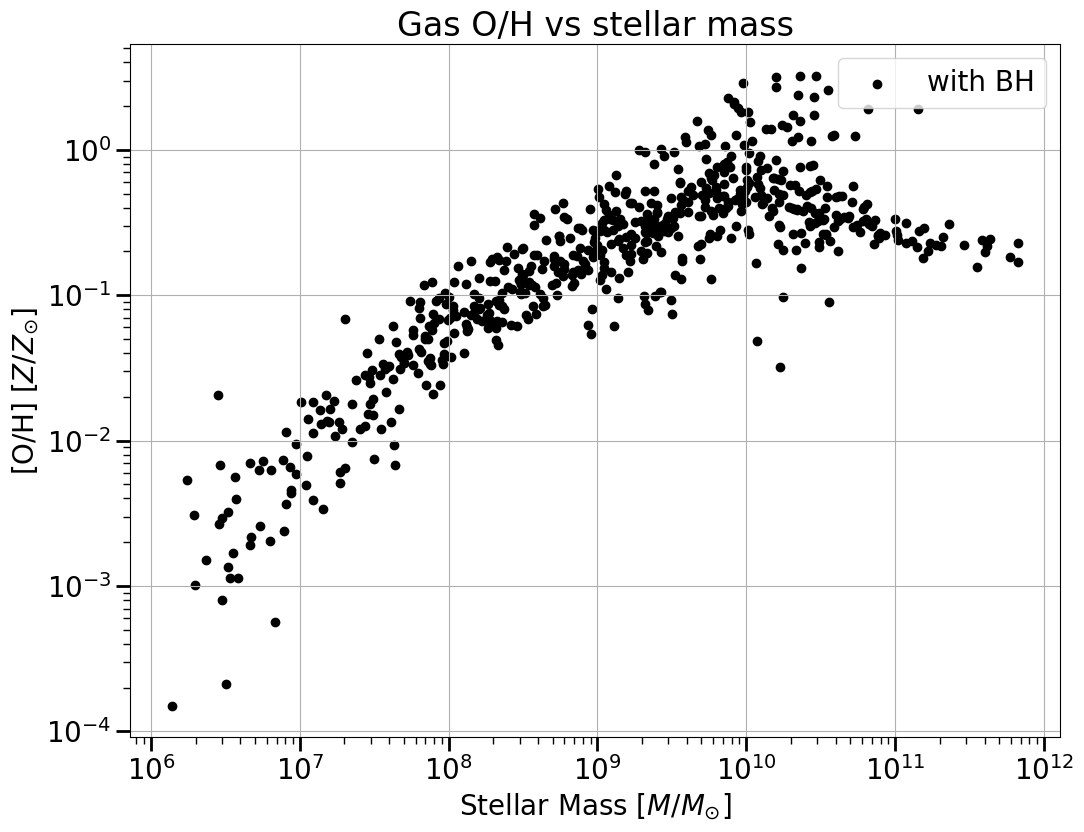

In [22]:
plt.scatter(stellar_mass_BH, BH_gas_ox_h/solar_metal, color = 'black', label = 'with BH')
#plt.scatter(stellar_mass, gas_ox_h/solar_metal, color = 'orange', label = 'no BH', alpha = 0.3)


plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e8, 1e11])
#plt.ylim([1e-1, 1e0])


plt.title('Gas O/H vs stellar mass')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('[O/H] $[Z/Z_{\odot}]$')
#plt.colorbar(label = 'log Star formation rates/Mstar')

plt.legend()
plt.grid()
plt.show()
#plt.savefig("./Pictures/stellar_fe_h_BH.png", bbox_inches='tight')

In [38]:
loop = np.arange(len(stellar_mass_BH))

BH_ind_7 = []
BH_ind_8 = []
BH_ind_9 = []
BH_ind_10 = []
BH_ind_11 = []
BH_ind_12 = []

for k in loop:
    BH_ind_7 = np.append(BH_ind_7, small_get_halo_ind(stellar_mass_BH, 1e7, k))
    BH_ind_8 = np.append(BH_ind_8, between_get_halo_ind(stellar_mass_BH, 1e7, 1e8, k))
    BH_ind_9 = np.append(BH_ind_9, between_get_halo_ind(stellar_mass_BH, 1e8, 1e9, k))
    BH_ind_10 = np.append(BH_ind_10, between_get_halo_ind(stellar_mass_BH, 1e9, 1e10, k))
    BH_ind_11 = np.append(BH_ind_11, between_get_halo_ind(stellar_mass_BH, 1e10, 1e11, k))
    BH_ind_12 = np.append(BH_ind_12, between_get_halo_ind(stellar_mass_BH, 1e11, 1e12, k))

In [39]:
BH_ind_7 = BH_ind_7.astype(int)
BH_ind_8 = BH_ind_8.astype(int)
BH_ind_9 = BH_ind_9.astype(int)
BH_ind_10 = BH_ind_10.astype(int)
BH_ind_11 = BH_ind_11.astype(int)
BH_ind_12 = BH_ind_12.astype(int)

In [40]:
BH_gas_o_7 = BH_gas_ox_h[BH_ind_7]  
BH_gas_o_8 = BH_gas_ox_h[BH_ind_8]  
BH_gas_o_9 = BH_gas_ox_h[BH_ind_9]  
BH_gas_o_10 = BH_gas_ox_h[BH_ind_10]  
BH_gas_o_11 = BH_gas_ox_h[BH_ind_11]  
BH_gas_o_12 = BH_gas_ox_h[BH_ind_12]  

BH_stellar_mass_7 = stellar_mass_BH[BH_ind_7]
BH_stellar_mass_8 = stellar_mass_BH[BH_ind_8]
BH_stellar_mass_9 = stellar_mass_BH[BH_ind_9]
BH_stellar_mass_10 = stellar_mass_BH[BH_ind_10]
BH_stellar_mass_11 = stellar_mass_BH[BH_ind_11]
BH_stellar_mass_12 = stellar_mass_BH[BH_ind_12]

In [41]:
BH_o_ave_7 = get_ave(BH_gas_o_7)
BH_o_ave_8 = get_ave(BH_gas_o_8)
BH_o_ave_9 = get_ave(BH_gas_o_9)
BH_o_ave_10 = get_ave(BH_gas_o_10)
BH_o_ave_11 = get_ave(BH_gas_o_11)
BH_o_ave_12 = get_ave(BH_gas_o_12)

BH_mass_ave_7 = get_ave(BH_stellar_mass_7)
BH_mass_ave_8 = get_ave(BH_stellar_mass_8)
BH_mass_ave_9 = get_ave(BH_stellar_mass_9)
BH_mass_ave_10 = get_ave(BH_stellar_mass_10)
BH_mass_ave_11 = get_ave(BH_stellar_mass_11)
BH_mass_ave_12 = get_ave(BH_stellar_mass_12)

In [42]:
BH_mass_ave = []
BH_mass_ave = np.append(BH_mass_ave, BH_mass_ave_7)
BH_mass_ave = np.append(BH_mass_ave, BH_mass_ave_8)
BH_mass_ave = np.append(BH_mass_ave, BH_mass_ave_9)
BH_mass_ave = np.append(BH_mass_ave, BH_mass_ave_10)
BH_mass_ave = np.append(BH_mass_ave, BH_mass_ave_11)
BH_mass_ave = np.append(BH_mass_ave, BH_mass_ave_12)

In [43]:
BH_o_ave = []
BH_o_ave = np.append(BH_o_ave, BH_o_ave_7)
BH_o_ave = np.append(BH_o_ave, BH_o_ave_8)
BH_o_ave = np.append(BH_o_ave, BH_o_ave_9)
BH_o_ave = np.append(BH_o_ave, BH_o_ave_10)
BH_o_ave = np.append(BH_o_ave, BH_o_ave_11)
BH_o_ave = np.append(BH_o_ave, BH_o_ave_12)

In [44]:
BH_o_7_std = st.stdev(BH_gas_o_7)
BH_o_8_std = st.stdev(BH_gas_o_8)
BH_o_9_std = st.stdev(BH_gas_o_9)
BH_o_10_std = st.stdev(BH_gas_o_10)
BH_o_11_std = st.stdev(BH_gas_o_11)
BH_o_12_std = st.stdev(BH_gas_o_12)

In [45]:
y_error2 = []
y_error2 = np.append(y_error2, BH_o_7_std)
y_error2 = np.append(y_error2, BH_o_8_std)
y_error2 = np.append(y_error2, BH_o_9_std)
y_error2 = np.append(y_error2, BH_o_10_std)
y_error2 = np.append(y_error2, BH_o_11_std)
y_error2 = np.append(y_error2, BH_o_12_std)

In [46]:
print(y_error/solar_metal)

[0.00540797 0.01028516 0.02786122 0.1052444  0.53742854 0.96296405]


# Plot

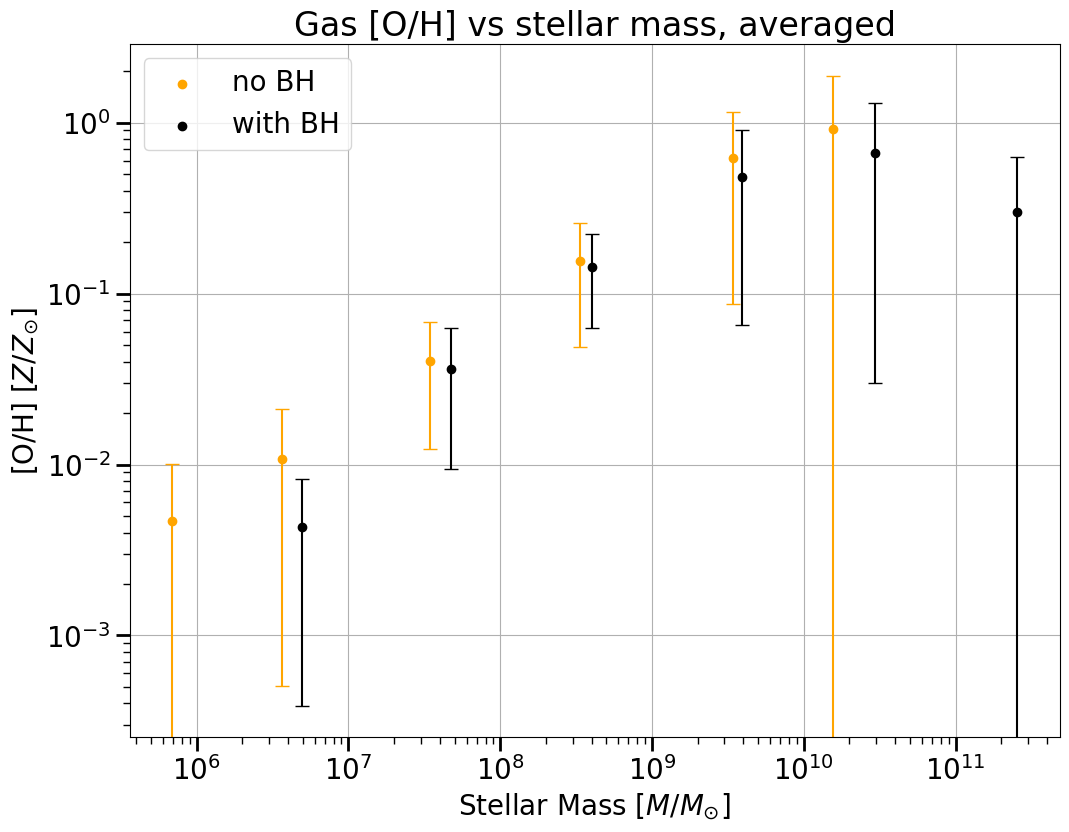

In [48]:
plt.scatter(mass_ave, o_ave/solar_metal, label = 'no BH', color = 'orange')
plt.scatter(BH_mass_ave, BH_o_ave/solar_metal, label = 'with BH', color = 'black')

plt.errorbar(mass_ave, o_ave/solar_metal, yerr = y_error/solar_metal, fmt = '.', capsize = 5, color = 'orange')
plt.errorbar(BH_mass_ave, BH_o_ave/solar_metal, yerr = y_error2/solar_metal, fmt = '.', capsize = 5, color = 'black')

plt.xscale('log')
plt.yscale('log')

plt.title('Gas [O/H] vs stellar mass, averaged')
plt.xlabel('Stellar Mass $[M/M_{\odot}]$')
plt.ylabel('[O/H] $[Z/Z_{\odot}]$')

plt.legend()
plt.grid()
#plt.show()
plt.savefig("./Pictures/gas_o_ave.png", bbox_inches='tight')